# Introduction

This competition is part 2 of famous kaggle competition [Titanic Disaster ML](https://www.kaggle.com/c/titanic). 
Spaceship Titanic distaster happened exactly after 1000 of [Titanic Disaster](https://en.wikipedia.org/wiki/Sinking_of_the_Titanic), where Spaceship Titanic was an interstellar passenger liner, with almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars. While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. 

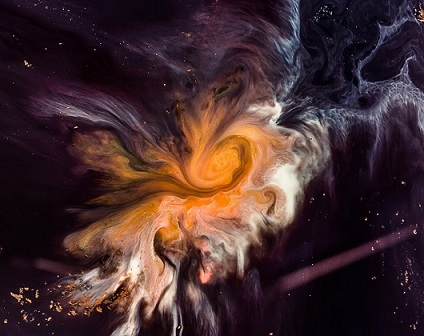

# Data Extraction

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing    
le = preprocessing.LabelEncoder()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline 

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

In [ ]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_df  = pd.read_csv('../input/spaceship-titanic/test.csv')

In [ ]:
train_df.head(5)

In [ ]:
train_df.shape

In [ ]:
train_df.info()

In [ ]:
train_df.describe()

In [ ]:
n = train_df.nunique(axis=0)  
print("No.of.unique values in each column :\n", n)

In [ ]:
def missing_percent_of_column(train_set):
    nan_percent = train_set.isnull().sum() #100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    # Rename the columns
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    # Sort the table by percentage of missing descending
    mis_percent = mis_percent_table
    return mis_percent

In [ ]:
miss = missing_percent_of_column(train_df)
miss

# Exploratory Data Analysis

In [ ]:
sns.histplot(x='Age', hue='Transported', data=train_df, bins=20, multiple="stack", kde=True)

In [ ]:
sns.catplot(y="Age", x="HomePlanet", hue="Destination", kind="bar", data=train_df)

In [ ]:
sns.countplot(x="HomePlanet",hue="Transported", data=train_df)

In [ ]:
sns.countplot(x="Transported", data=train_df)

As we can see above graph, data is perfectly balanced data. We dont need to worry about data imbalanced.

In [ ]:
sns.countplot(x="Destination",hue="Transported", data=train_df)

In [ ]:
sns.histplot(x="HomePlanet",hue="Destination", data=train_df, multiple="stack", kde=True)

In [ ]:
sns.countplot(x="CryoSleep",hue="Transported", data=train_df)

In [ ]:
sns.countplot(x="VIP",hue="Transported", data=train_df)

In [ ]:
sns.histplot(data=train_df, x="Age", binwidth=5,multiple="stack", kde=True)

In [ ]:
sns.scatterplot(data=train_df, x='Age', y='RoomService',hue="Transported",legend="full")

In [ ]:
sns.scatterplot(data=train_df, x='Age', y='Spa',hue="Transported",legend="full")

In [ ]:
sns.scatterplot(data=train_df, x='Age', y='VRDeck',hue="Transported",legend="full")

# Feature Engineering

**Handling Outliers**

Approach which we took for outlier is to assign mean values, and ignoring outliers while calculating it.

In [ ]:
sns.boxplot(x='FoodCourt',data=train_df)

In [ ]:
train_df.loc[train_df['FoodCourt'] > 20000, 'FoodCourt'] = train_df.loc[train_df['FoodCourt'] < 20000, 'FoodCourt'].mean()

In [ ]:
sns.boxplot(x='Transported', y='ShoppingMall',data=train_df)

In [ ]:
train_df.loc[train_df['ShoppingMall'] > 10000, 'ShoppingMall'] = train_df.loc[train_df['ShoppingMall'] < 10000, 'ShoppingMall'].mean()

In [ ]:
sns.boxplot(x='Spa',data=train_df)

In [ ]:
train_df.loc[train_df['Spa'] > 20000, 'Spa'] = train_df.loc[train_df['Spa'] < 20000, 'Spa'].mean()

In [ ]:
sns.boxplot(x='VRDeck',data=train_df)

In [ ]:
train_df.loc[train_df['VRDeck'] > 20000, 'VRDeck'] = train_df.loc[train_df['VRDeck'] < 20000, 'VRDeck'].mean()

In [ ]:
sns.boxplot(x='RoomService',data=train_df)

In [ ]:
train_df.loc[train_df['RoomService'] > 10000, 'RoomService'] = train_df.loc[train_df['RoomService'] < 10000, 'RoomService'].mean()

**Handling null rows**

I had gone with below method,

For Categorical columns: I had used most occuring values.
For Numerical columns: I had gone with mean values.

In [ ]:
train_df['HomePlanet']= train_df['HomePlanet'].fillna('Earth')
test_df['HomePlanet']= test_df['HomePlanet'].fillna('Earth')

In [ ]:
train_df['Destination']= train_df['Destination'].fillna('TRAPPIST-1e')
test_df['Destination']= test_df['Destination'].fillna('TRAPPIST-1e')

Destination values doesnt look very valid, so just rename them.

In [ ]:
train_df['Destination'] = train_df['Destination'].str.replace("TRAPPIST-1e","TRAPPIST")
train_df['Destination'] = train_df['Destination'].str.replace("55 Cancri e","Cancri")
train_df['Destination'] = train_df['Destination'].str.replace("PSO J318.5-22","PSO")

test_df['Destination'] = test_df['Destination'].str.replace("TRAPPIST-1e","TRAPPIST")
test_df['Destination'] = test_df['Destination'].str.replace("55 Cancri e","Cancri")
test_df['Destination'] = test_df['Destination'].str.replace("PSO J318.5-22","PSO")

In [ ]:
train_df['CryoSleep']= train_df['CryoSleep'].fillna(False)
test_df['CryoSleep']= test_df['CryoSleep'].fillna(False)

In [ ]:
train_df['VIP']= train_df['VIP'].fillna(False)
test_df['VIP']= test_df['VIP'].fillna(False)

In [ ]:
train_df['Age'].mean()

In [ ]:
train_df['Age']= train_df['Age'].fillna(29)
test_df['Age']= test_df['Age'].fillna(29)

In [ ]:
train_df['Spa']= train_df['Spa'].fillna(train_df['Spa'].mean())
test_df['Spa']= test_df['Spa'].fillna(test_df['Spa'].mean())

In [ ]:
train_df['FoodCourt']= train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean())
test_df['FoodCourt']= test_df['FoodCourt'].fillna(test_df['FoodCourt'].mean())

In [ ]:
train_df['ShoppingMall']= train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean())
test_df['ShoppingMall']= test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mean())

In [ ]:
train_df['RoomService']= train_df['RoomService'].fillna(train_df['RoomService'].mean())
test_df['RoomService']= test_df['RoomService'].fillna(test_df['RoomService'].mean())

In [ ]:
train_df['VRDeck']= train_df['VRDeck'].fillna(train_df['VRDeck'].mean())
test_df['VRDeck']= test_df['VRDeck'].fillna(test_df['VRDeck'].mean())

In [ ]:
def converting_column(df,col,convertType):
    if convertType=='OHE':
        one_hot = pd.get_dummies(df[col],prefix=col)
        df = df.drop(col,axis = 1)
        df = df.join(one_hot)
        return df
    else:
        df[col] = le.fit_transform(df[col])
        return df

In [ ]:
train_df = converting_column(train_df,'HomePlanet','OHE')
test_df = converting_column(test_df,'HomePlanet','OHE')

In [ ]:
train_df = converting_column(train_df,'Destination','FTR')
test_df = converting_column(test_df,'Destination','FTR')

In [ ]:
train_df = converting_column(train_df,'CryoSleep','FTR')
test_df = converting_column(test_df,'CryoSleep','FTR')

In [ ]:
train_df = converting_column(train_df,'VIP','FTR')
test_df = converting_column(test_df,'VIP','FTR')

**Creating new columns**

For Cabin and Pasenger Id, there is good amount details which we can extract.
Cabin : It has 3 seperate details which is seperated by '/'. Deck, Deck Num, & Side
Passenger Id : If we check carefully, Passenger Id is one up number with Family name, and second part is family count. 

In [ ]:
def CabinExtract(df):
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)    
    df['Num'] = df['Num'].astype(float)
    
    df['Deck']= df['Deck'].fillna('G')
    df['Num']= df['Num'].fillna(df['Num'].mean())
    df['Side']= df['Side'].fillna('S')
    
             
    df['Deck'] = le.fit_transform(df['Deck'])
    df['Side'] = le.fit_transform(df['Side'])
    
    return df

In [ ]:
train_df = CabinExtract(train_df)
test_df = CabinExtract(test_df)

In [ ]:
def findFamilyId(df):
    df[['Passenger_Group_Id', 'Passenger_Num']] = df['PassengerId'].str.split('_', expand=True)
    df['Passenger_Group_Id'] = df['Passenger_Group_Id'].astype(int)
    df['Passenger_Num'] = df['Passenger_Num'].astype(int)
    df['Passenger_Cnt'] = df.groupby('Passenger_Group_Id')['Passenger_Num'].transform('max')
    return df

In [ ]:
train_df = findFamilyId(train_df)
test_df = findFamilyId(test_df)

In [ ]:
train_df = train_df.drop(['Cabin','Name'], axis=1)
test_df = test_df.drop(['Cabin','Name'], axis=1)

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)

# Feature Selection

I am using **Spearman coefficient corelation** to find out relations between two columns, because **spearman correlation evaluates the monotonic relationship**.

**What is a monotonic relationship?**

A monotonic relationship is a relationship that does one of the following:

(1) as the value of one variable increases, so does the value of the other variable, OR,
(2) as the value of one variable increases, the other variable value decreases.

But, not exactly at a constant rate whereas in a linear relationship the rate of increase/decrease is constant.

Read further: https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8

In [ ]:
plt.figure(figsize=(17,17))
corr=train_df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
g=sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

If you check above graph, we can conclude on below points, 
1. Passenger_Num & Passenger_Cnt has a very strong correlation.Passenger_Num has a weak correlation Transported. So let's drop this column.
2. HomePlanet_Europa & Deck has a very strong correlation. Deck has a weak correlation Transported. So let's drop this column.
3. Passenger_Group_Id,VIP, & Deck have very poor correlation with Transported (close to 0). So let's drop this column.

In [ ]:
train_df = train_df.drop(['Passenger_Num','Passenger_Group_Id','VIP','Deck','HomePlanet_Mars'], axis=1)
test_df = test_df.drop(['Passenger_Num','Passenger_Group_Id','VIP','Deck','HomePlanet_Mars'], axis=1)

Age column surprisingly has weak relation with the Transported column. So rather than removing it, let's create a new column from it.
If you observe the age histogram above, under 15 age passengers have mostly been transported. Kids might have been given more priority while transporting to another dimension after the blast.

In [ ]:
train_df['Under15'] = train_df['Age'].apply(lambda x: 1 if x < 15 else 0)
test_df['Under15'] = test_df['Age'].apply(lambda x: 1 if x < 15 else 0)
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)

In [ ]:
train_df.head(5)

# Data Split

In [ ]:
X = train_df.drop("Transported", axis=1)
y = train_df["Transported"]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape,X_valid.shape, y_valid.shape , X_test.shape

# Model Training

In [ ]:
xgb_model = XGBClassifier(n_estimators= 637,learning_rate=0.01,subsample= 0.6, min_child_weight=1, max_depth=5,objective='binary:logistic')
mod = xgb_model.fit(X_train, y_train,eval_metric='logloss')

print("Performance on train data:", mod.score(X_train, y_train))

y_pred_v = xgb_model.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred_v) 
print ("Confusion Matrix : \n", cm)

In [ ]:
rfc_single = RandomForestClassifier(bootstrap= False, n_estimators=529, max_depth=15, min_samples_split=5,min_samples_leaf=4,max_features='auto',verbose=0)
rfc_single.fit(X_train, y_train)

print("Performance on train data:", rfc_single.score(X_train, y_train))

y_pred_v = rfc_single.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred_v)
 
print ("Confusion Matrix : \n", cm)

In [ ]:
model = LGBMClassifier(n_estimators=975, min_child_samples=5, max_depth=8, learning_rate=0.01,feature_fraction=0.6, 
                       bagging_freq=5, bagging_fraction= 0.9,objective ='binary')
model.fit(X_train, y_train)

print("Performance on train data:", model.score(X_train, y_train))

y_pred_v = model.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred_v) 
print ("Confusion Matrix : \n", cm)

# Prediction & Submission

In [ ]:
y_pred_x = model.predict(X_test)
y_pred_x

In [ ]:
PassengerId = test_df['PassengerId']
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'PassengerId':PassengerId,'Transported':y_pred_x})

In [ ]:
submission.to_csv('submission.csv',index=False)